## Clustering

In [34]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib

### 1. Data Preprocessing

In [35]:
xl = pd.ExcelFile("EastWestAirlines.xlsx")
print(xl.sheet_names)

['Description', 'data']


In [36]:
data = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [37]:
data.shape

(3999, 12)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [39]:
# Checking for Null Values
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [40]:
# Select relevant columns for clustering
data = data.drop(['ID#'], axis=1)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


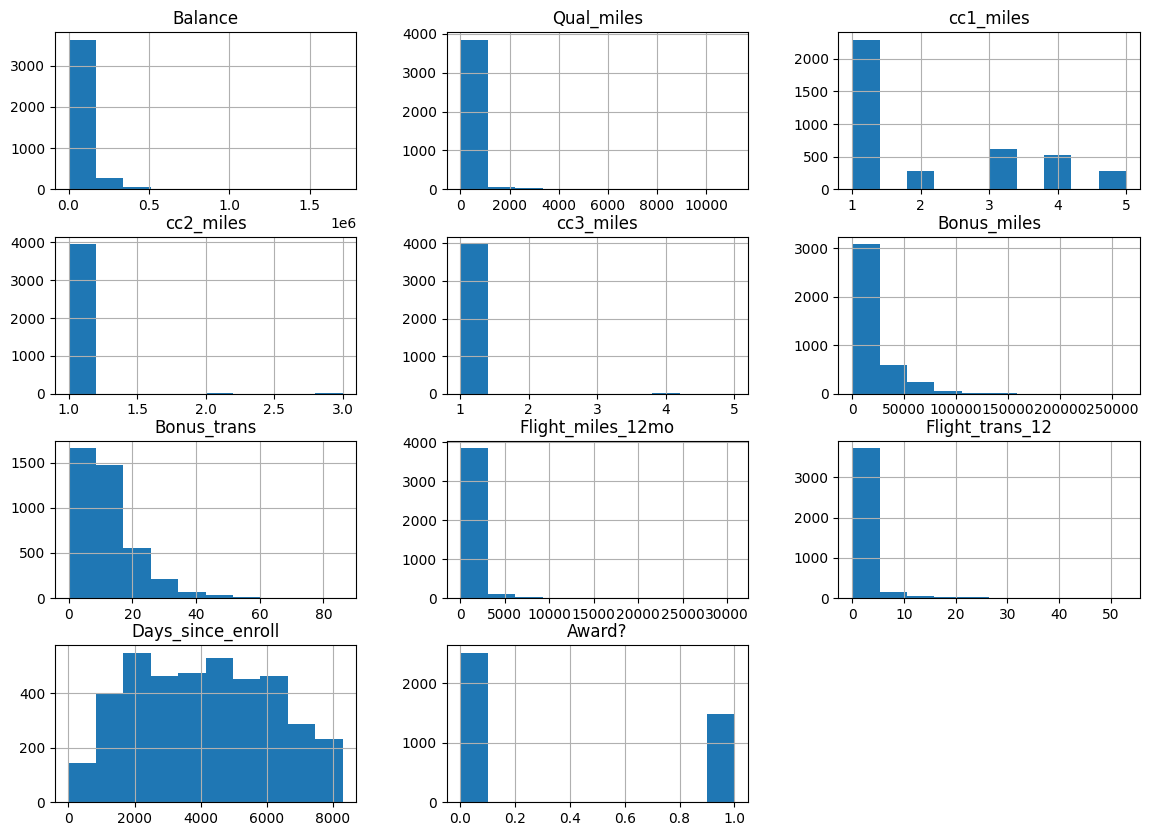

In [41]:
# Outlier detection
data.hist(figsize=[14, 10])
plt.show()

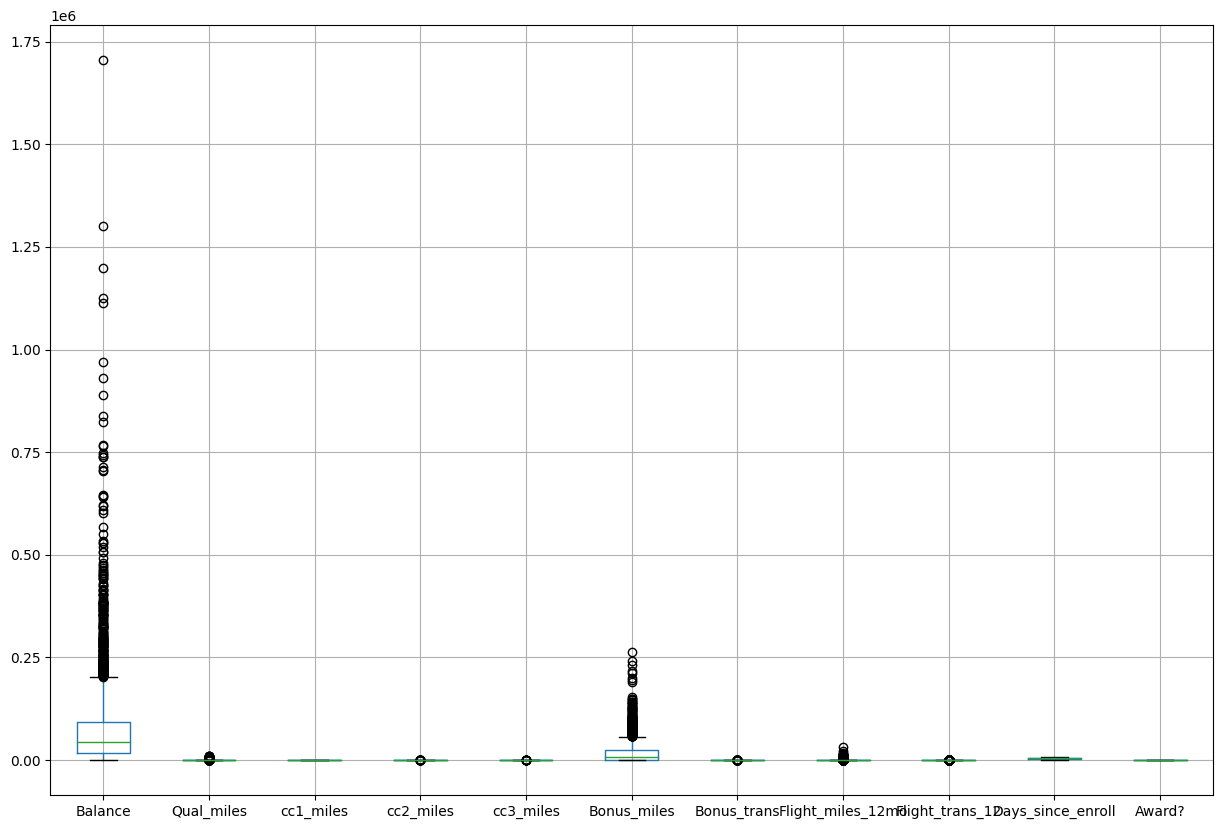

In [42]:
data.boxplot(figsize=[15, 10])
plt.show()

**Balance and Bunus_miles have plenty of outliers. Hence we need to treat them with Standard Scalar**

In [43]:
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering (excluding Award?)
X = data.drop(['Award?'], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled data
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


### Exploratory Data Analysis (EDA)

In [44]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


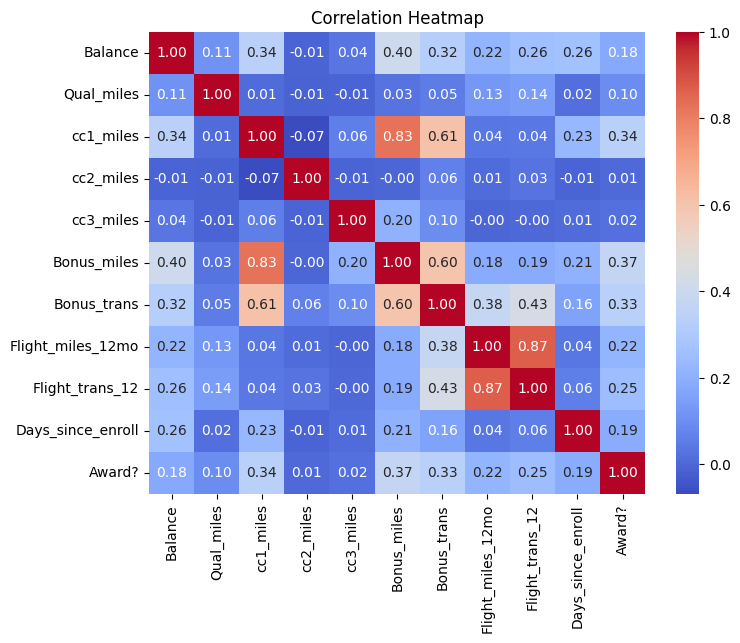

In [45]:
# Correlation heat map

corr = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The high positive correlation between Bonus_miles and cc1_miles (0.83) suggests that as the number of bonus miles increases, the miles accumulated on the first credit card (cc1_miles) also tend to increase significantly. This could indicate that frequent flyers who earn more bonus miles are also likely to use their first credit card more for accumulating additional miles.

Similarly, the high correlation between Flight_miles_12mo and Flight_trans_12 (0.87) indicates that passengers who fly more miles in the past 12 months also tend to have more flight transactions in the same period. This suggests a pattern where individuals who travel long distances also have a higher frequency of flights.

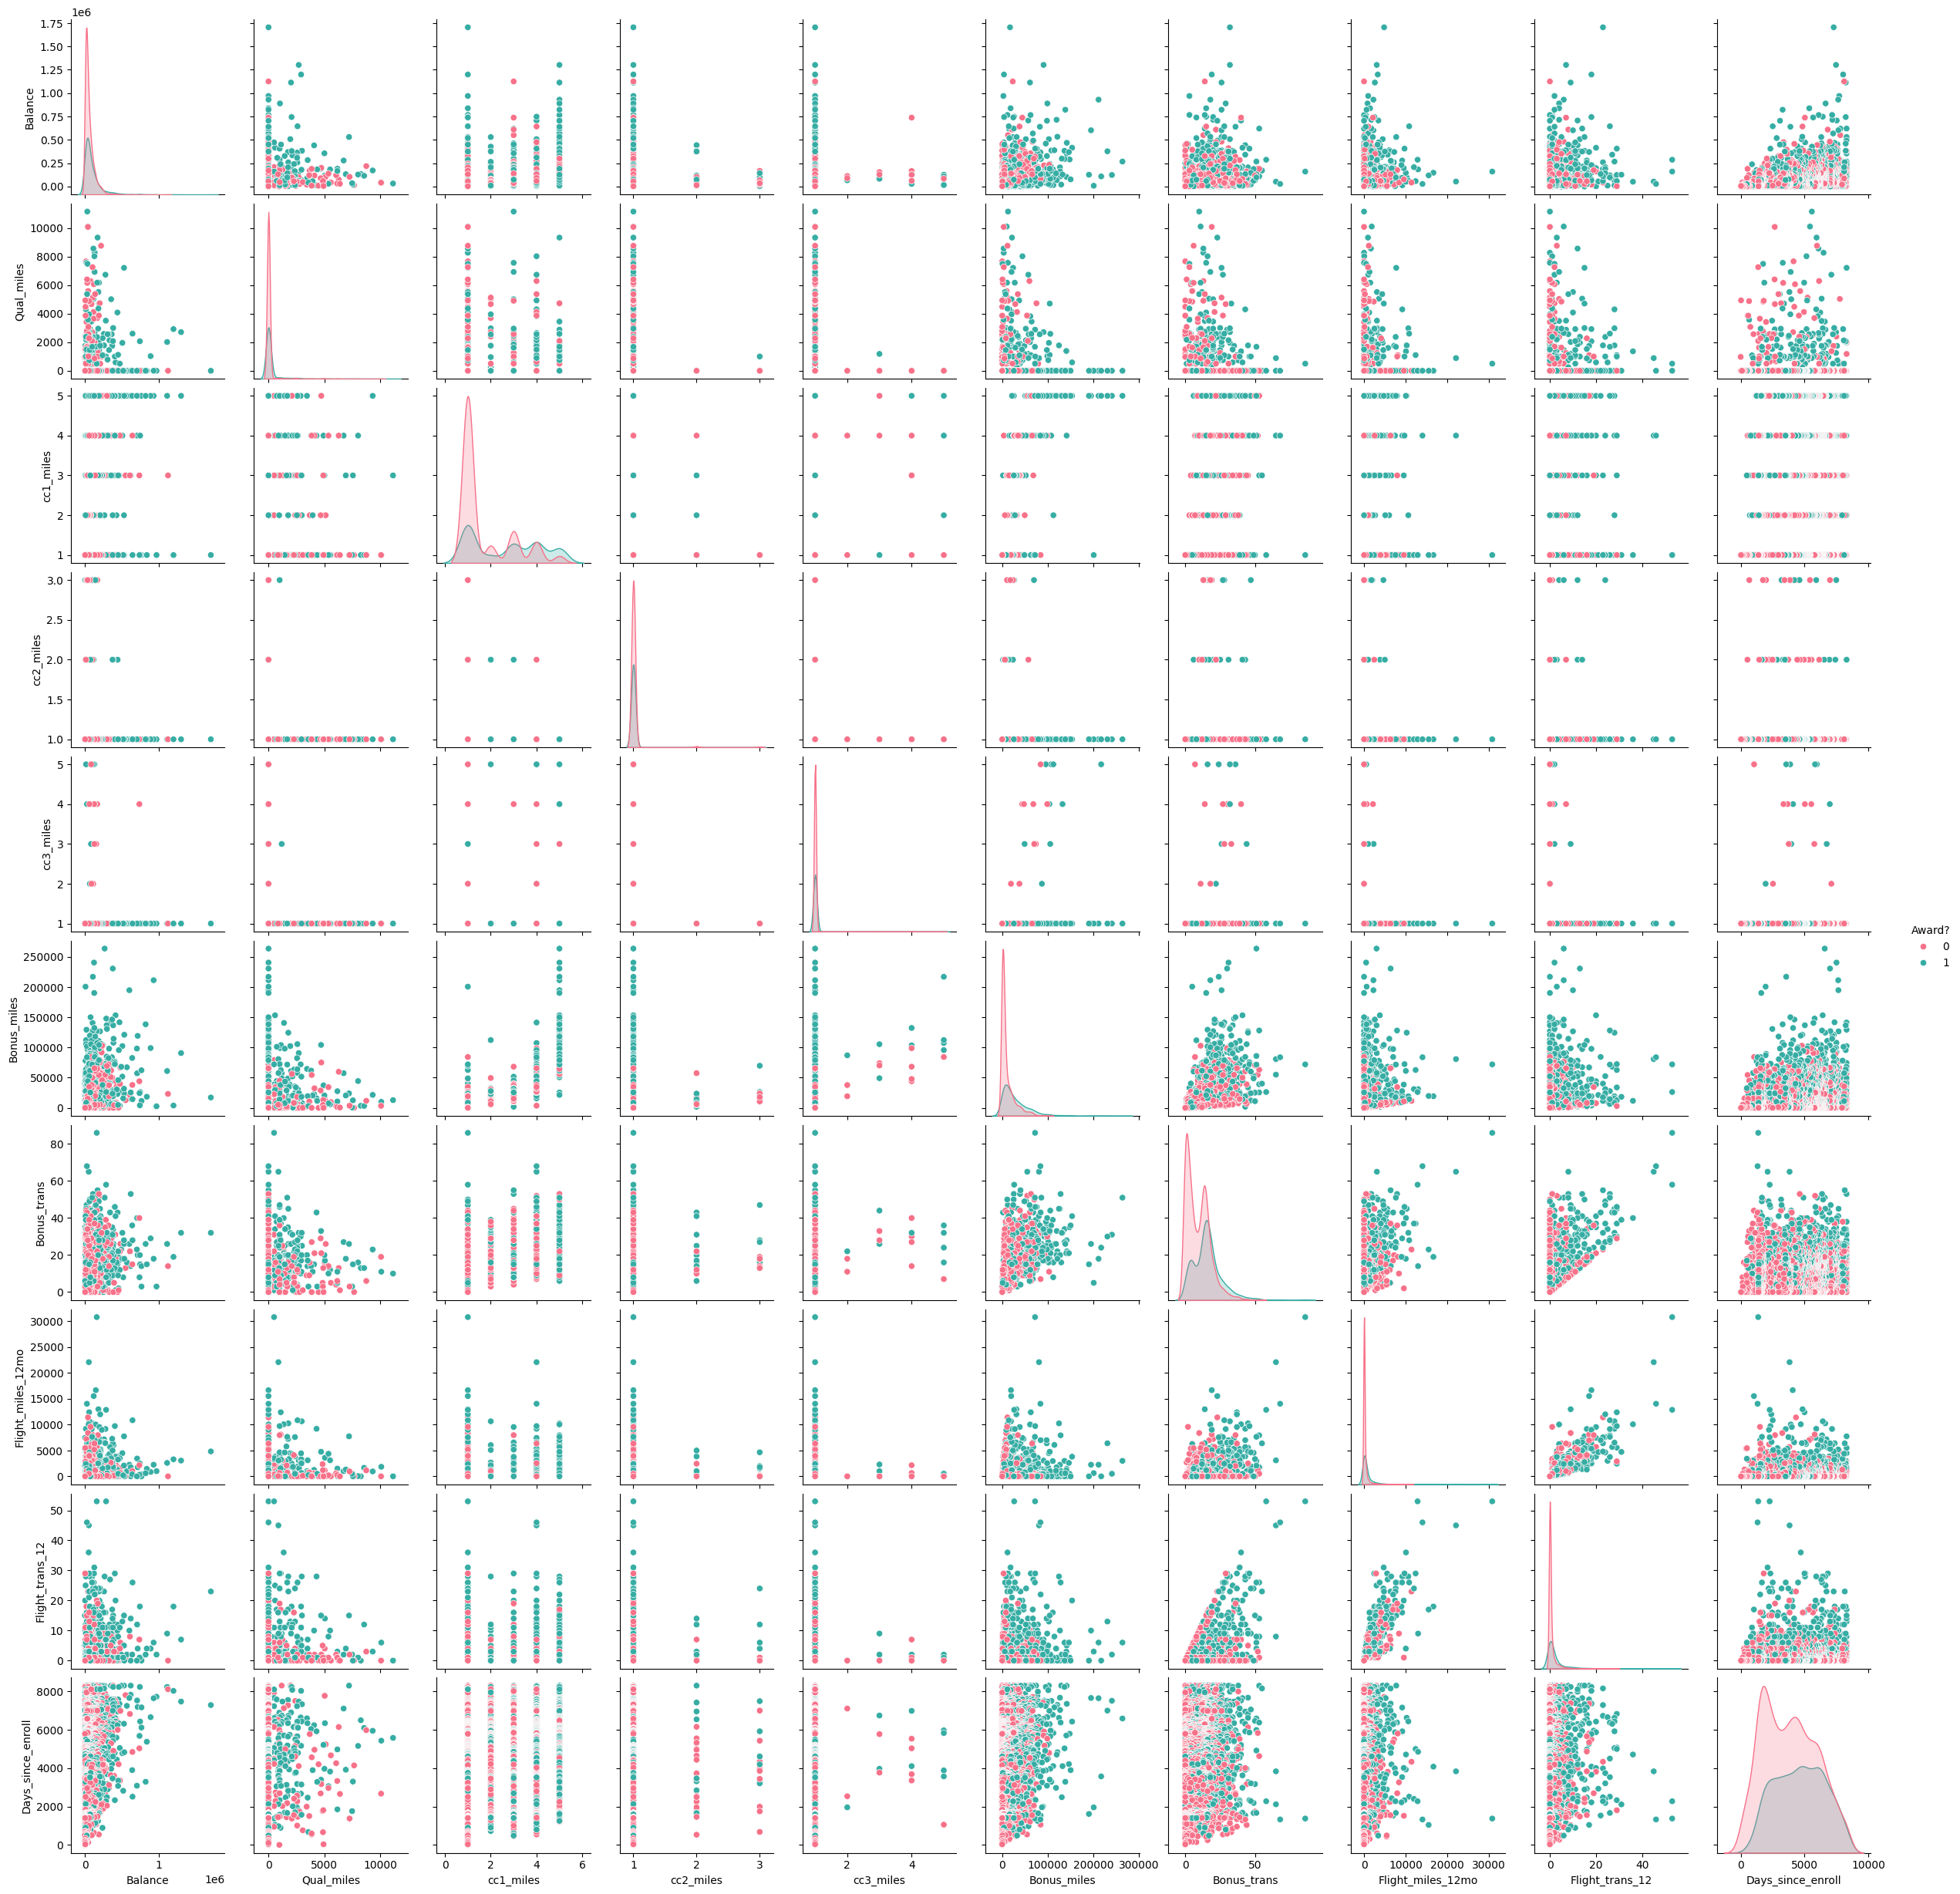

In [46]:
# Pairplot to visualize relationships
sns.pairplot(data, diag_kind='kde', hue='Award?', palette='husl')
plt.show()

### 2. Implementing Clustring Algorithms.

In [47]:
# Apply PCA for Visualization
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### 1. K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

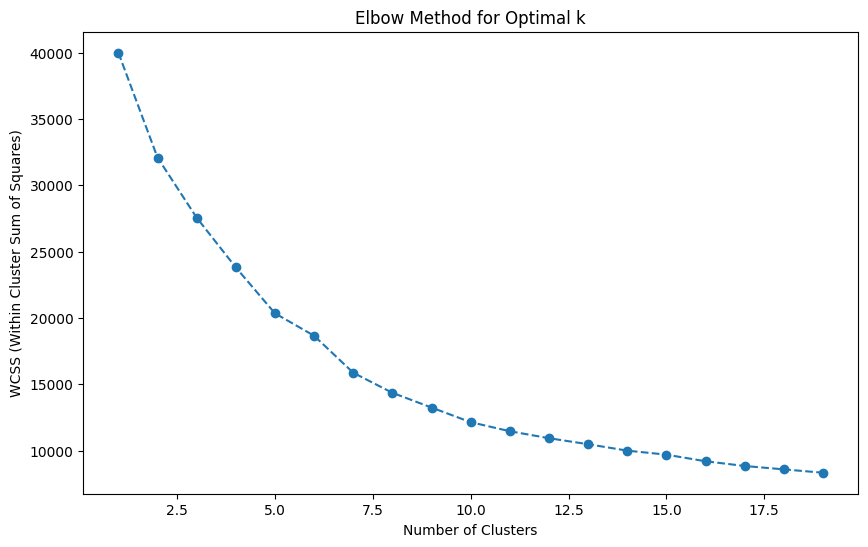

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

**As we can see from the Elbow diagram, from 14 onwords its almost a flat line, hence we consider number of clusters as 14 and 15**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


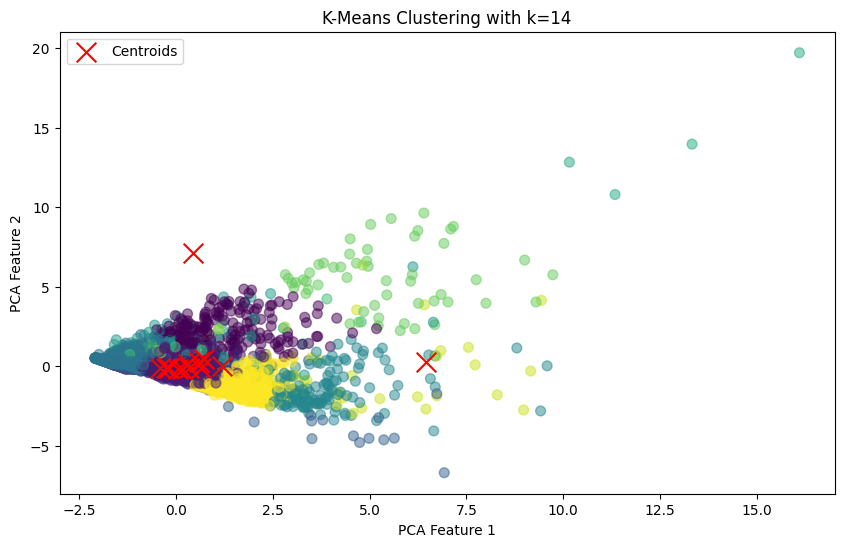

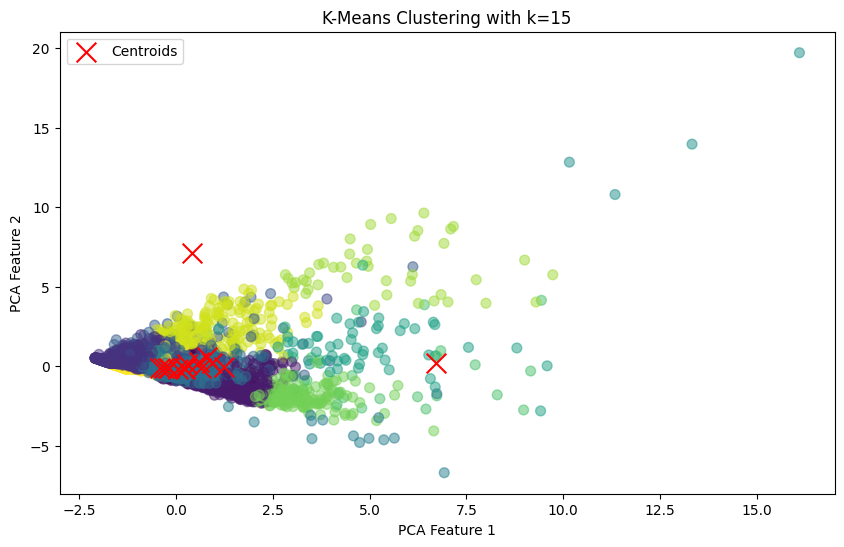

In [49]:
# Fit K-Means with k=14 and k=15
kmeans_14 = KMeans(n_clusters=14, init='k-means++', random_state=42)
kmeans_15 = KMeans(n_clusters=15, init='k-means++', random_state=42)

kmeans_14.fit(X_scaled)
kmeans_15.fit(X_scaled)

# Visualize the clusters using PCA-transformed data
def plot_kmeans(kmeans, X_pca, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.legend()
    plt.show()

plot_kmeans(kmeans_14, X_pca, 'K-Means Clustering with k=14')
plot_kmeans(kmeans_15, X_pca, 'K-Means Clustering with k=15')

#### 2. Hierarchical Clustering with Different Parameters

In [50]:
# Plot the dendrogram
def plot_dendrogram(linked, title):
    plt.figure(figsize=(15, 8))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(title)
    plt.ylabel('Distance')
    plt.show()

In [51]:
# Visualize the clusters using PCA-transformed data
def plot_agglomerative(labels, X_pca, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.show()

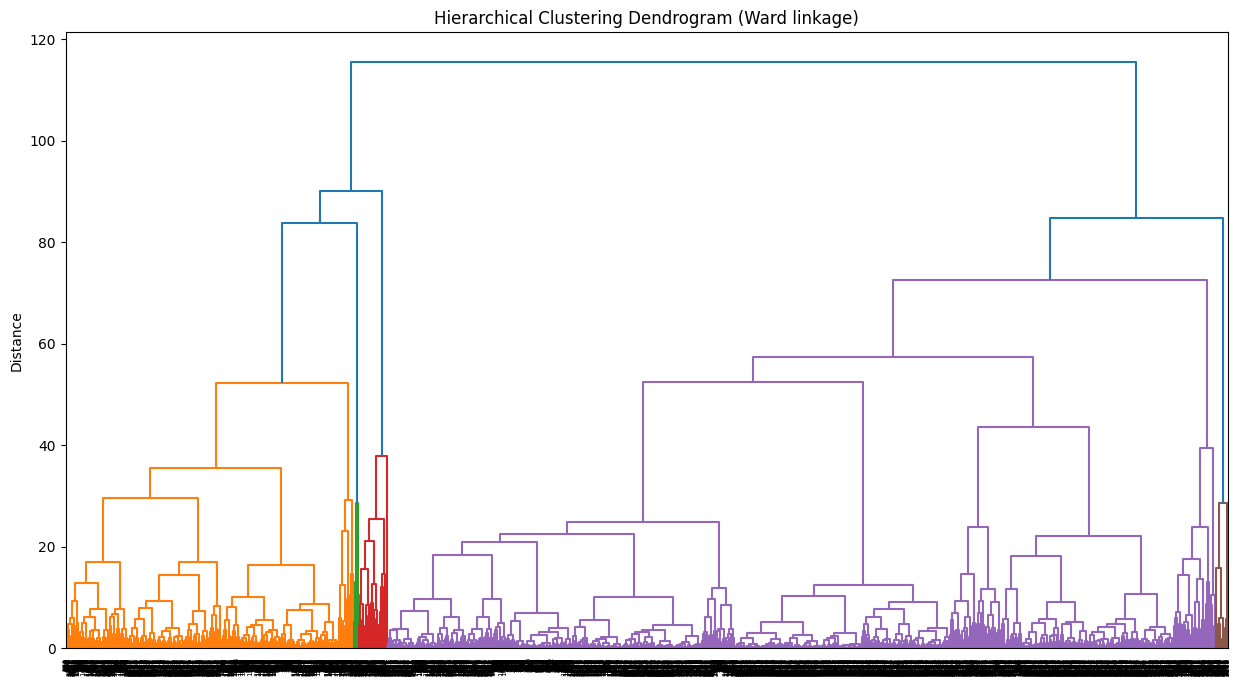

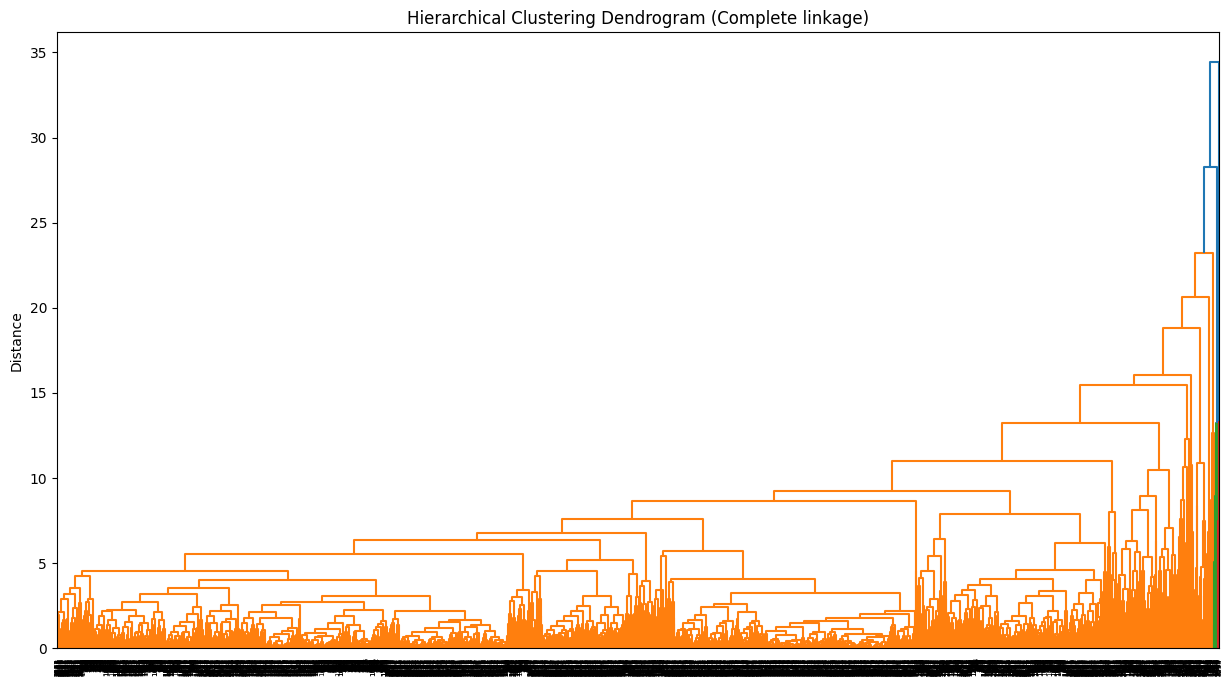

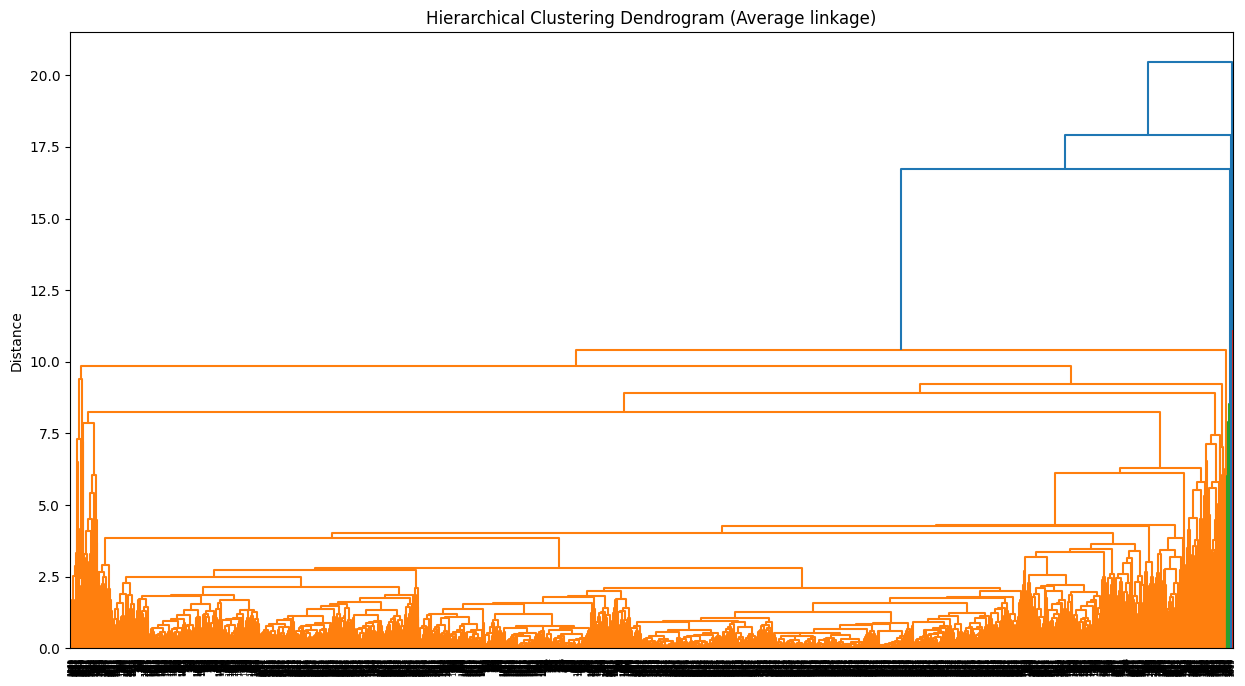

In [52]:
# Plot of Dendrograms using different linkage methods
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

# Generate the linkage matrix for hierarchical clustering
linked_ward = linkage(X_scaled, method='ward')
linked_complete = linkage(X_scaled, method='complete')
linked_average = linkage(X_scaled, method='average')

# Plot the dendrogram
plot_dendrogram(linked_ward, 'Hierarchical Clustering Dendrogram (Ward linkage)')
plot_dendrogram(linked_complete, 'Hierarchical Clustering Dendrogram (Complete linkage)')
plot_dendrogram(linked_average, 'Hierarchical Clustering Dendrogram (Average linkage)')

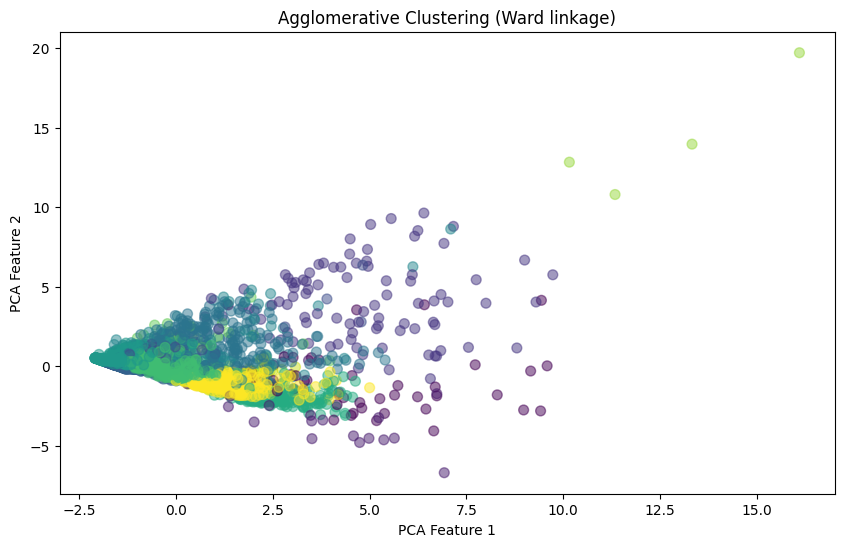

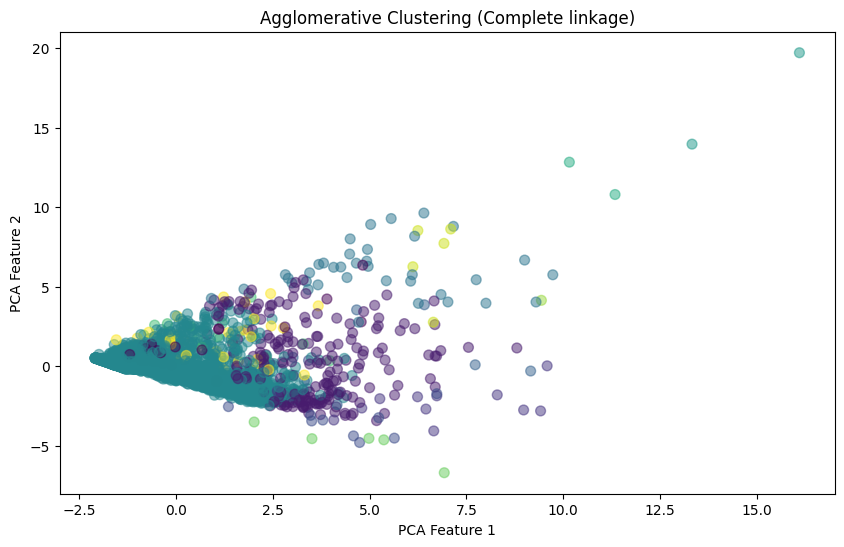

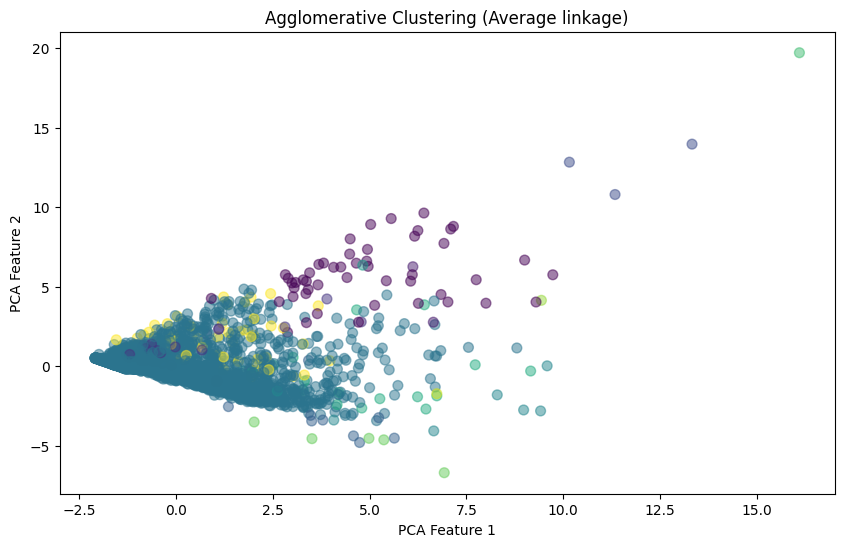

In [53]:
# Fit Agglomerative Clustering with different linkage methods
agglo_ward = AgglomerativeClustering(n_clusters=14, linkage='ward')
agglo_complete = AgglomerativeClustering(n_clusters=14, linkage='complete')
agglo_average = AgglomerativeClustering(n_clusters=14, linkage='average')

labels_ward = agglo_ward.fit_predict(X_scaled)
labels_complete = agglo_complete.fit_predict(X_scaled)
labels_average = agglo_average.fit_predict(X_scaled)

plot_agglomerative(labels_ward, X_pca, 'Agglomerative Clustering (Ward linkage)')
plot_agglomerative(labels_complete, X_pca, 'Agglomerative Clustering (Complete linkage)')
plot_agglomerative(labels_average, X_pca, 'Agglomerative Clustering (Average linkage)')

### DBSCAN with Different Parameters

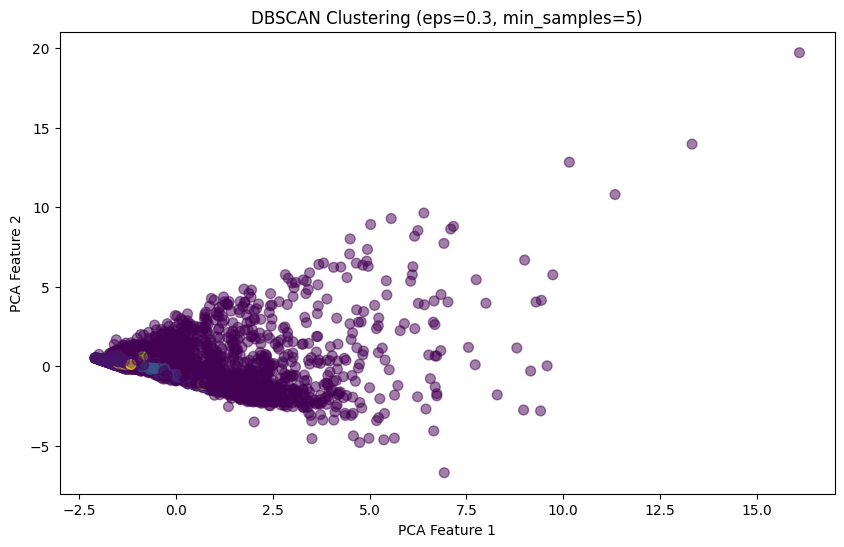

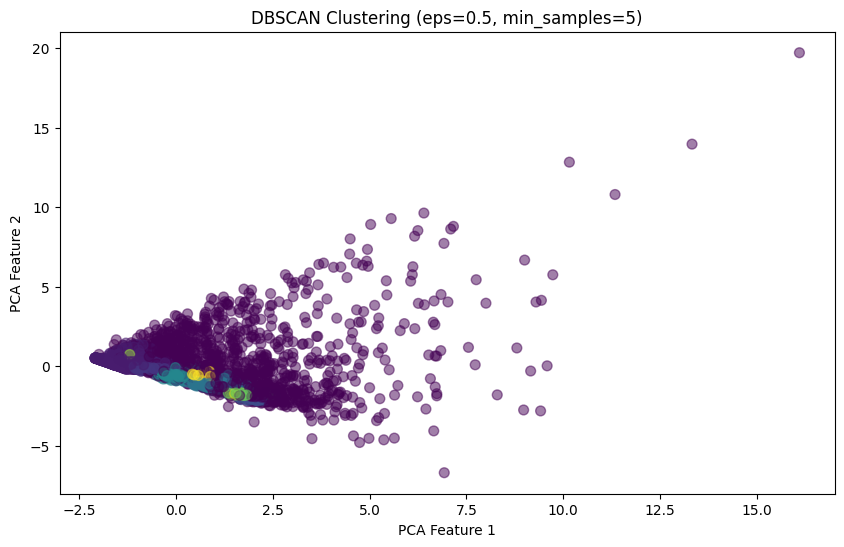

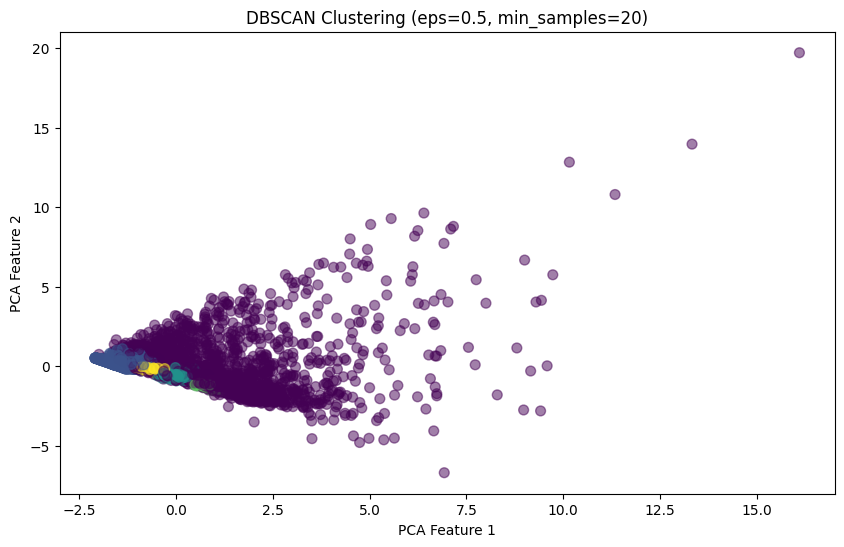

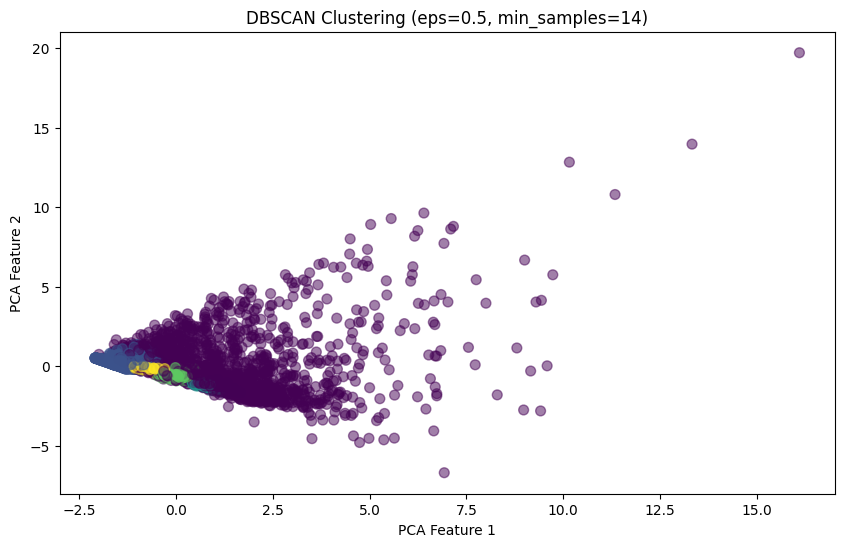

In [54]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with different epsilon and min_samples values
dbscan_1 = DBSCAN(eps=0.3, min_samples=5)
dbscan_2 = DBSCAN(eps=0.5, min_samples=5)
dbscan_3 = DBSCAN(eps=0.5, min_samples=20)
dbscan_4 = DBSCAN(eps=0.5, min_samples=14)

clusters_dbscan_1 = dbscan_1.fit_predict(X_scaled)
clusters_dbscan_2 = dbscan_2.fit_predict(X_scaled)
clusters_dbscan_3 = dbscan_3.fit_predict(X_scaled)
clusters_dbscan_4 = dbscan_4.fit_predict(X_scaled)

# Visualize the clusters using PCA-transformed data
def plot_dbscan(clusters, X_pca, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.show()

plot_dbscan(clusters_dbscan_1, X_pca, 'DBSCAN Clustering (eps=0.3, min_samples=5)')
plot_dbscan(clusters_dbscan_2, X_pca, 'DBSCAN Clustering (eps=0.5, min_samples=5)')
plot_dbscan(clusters_dbscan_3, X_pca, 'DBSCAN Clustering (eps=0.5, min_samples=20)')
plot_dbscan(clusters_dbscan_4, X_pca, 'DBSCAN Clustering (eps=0.5, min_samples=14)')

### Evaluation and Performance Metrics

**Evaluation With Calinski Harabasz Score**

In [55]:
from sklearn.metrics import calinski_harabasz_score

# Accuracy Scores with calinski_harabasz_score

# Evaluate K-Means clustering
labels_14 = kmeans_14.labels_
labels_15 = kmeans_15.labels_

score_14 = calinski_harabasz_score(X_scaled, labels_14)
score_15 = calinski_harabasz_score(X_scaled, labels_15)

print("Scores of K-Means clustering")
print(f"K-Means calinski_harabasz_score (k=14): {score_14}")
print(f"K-Means calinski_harabasz_score (k=15): {score_15}")
print()

# Evaluate Agglomerative clustering
score_ward = calinski_harabasz_score(X_scaled, labels_ward)
score_complete = calinski_harabasz_score(X_scaled, labels_complete)
score_average = calinski_harabasz_score(X_scaled, labels_average)

print("Scores of Agglomerative clustering")
print(f"Agglomerative Clustering Calinski_Harabasz_score (Ward linkage): {score_ward}")
print(f"Agglomerative Clustering Calinski_Harabasz_score (Complete linkage): {score_complete}")
print(f"Agglomerative Clustering Calinski-Harabasz Score (Average linkage): {score_average}")
print()

# DBSCAN Clustering
# Note: DBSCAN clusters with -1 are noise points and should be filtered out before silhouette score calculation
score_dbscan_1 = calinski_harabasz_score(X_scaled[clusters_dbscan_1 != -1], clusters_dbscan_1[clusters_dbscan_1 != -1])
score_dbscan_2 = calinski_harabasz_score(X_scaled[clusters_dbscan_2 != -1], clusters_dbscan_2[clusters_dbscan_2 != -1])
score_dbscan_3 = calinski_harabasz_score(X_scaled[clusters_dbscan_3 != -1], clusters_dbscan_3[clusters_dbscan_3 != -1])
score_dbscan_4 = calinski_harabasz_score(X_scaled[clusters_dbscan_4 != -1], clusters_dbscan_4[clusters_dbscan_4 != -1])

print("Scores of DBSCAN clustering")
print(f"DBSCAN Calinski-Harabasz Score (eps=0.3, min_samples=5): {score_dbscan_1}")
print(f"DBSCAN Calinski-Harabasz Score (eps=0.5, min_samples=5): {score_dbscan_2}")
print(f"DBSCAN Calinski-Harabasz Score (eps=0.5, min_samples=20): {score_dbscan_3}")
print(f"DBSCAN Calinski-Harabasz Score (eps=0.5, min_samples=14): {score_dbscan_4}")

Scores of K-Means clustering
K-Means calinski_harabasz_score (k=14): 919.332075336392
K-Means calinski_harabasz_score (k=15): 888.9865044722739

Scores of Agglomerative clustering
Agglomerative Clustering Calinski_Harabasz_score (Ward linkage): 750.2906852871257
Agglomerative Clustering Calinski_Harabasz_score (Complete linkage): 310.55628999286813
Agglomerative Clustering Calinski-Harabasz Score (Average linkage): 236.0843438288638

Scores of DBSCAN clustering
DBSCAN Calinski-Harabasz Score (eps=0.3, min_samples=5): 70.56209001342836
DBSCAN Calinski-Harabasz Score (eps=0.5, min_samples=5): 258.3138203793033
DBSCAN Calinski-Harabasz Score (eps=0.5, min_samples=20): 569.8752197391292
DBSCAN Calinski-Harabasz Score (eps=0.5, min_samples=14): 620.7873004442207


**Evaluation With Silhouette Score**

In [56]:
from sklearn.metrics import silhouette_score

# Evaluate K-Means clustering
kmeans_silhouette_14 = silhouette_score(X_scaled, labels_14)
kmeans_silhouette_15 = silhouette_score(X_scaled, labels_15)

print("Scores of K-Means clustering")
print(f"K-Means Silhouette Score (k=14): {kmeans_silhouette_14}")
print(f"K-Means Silhouette Score (k=15): {kmeans_silhouette_15}")
print()

# Evaluate Agglomerative clustering
agglo_silhouette_ward = silhouette_score(X_scaled, labels_ward)
agglo_silhouette_complete = silhouette_score(X_scaled, labels_complete)
agglo_silhouette_average = silhouette_score(X_scaled, labels_average)

print("Scores of Agglomerative clustering")
print(f"Agglomerative Clustering Silhouette Score (Ward linkage): {agglo_silhouette_ward}")
print(f"Agglomerative Clustering Silhouette Score (Complete linkage): {agglo_silhouette_complete}")
print(f"Agglomerative Clustering Silhouette Score (Average linkage): {agglo_silhouette_average}")
print()

# Evaluate DBSCAN clustering
# Note: DBSCAN clusters with -1 are noise points and should be filtered out before silhouette score calculation
dbscan_silhouette_1 = silhouette_score(X_scaled[clusters_dbscan_1 != -1], clusters_dbscan_1[clusters_dbscan_1 != -1])
dbscan_silhouette_2 = silhouette_score(X_scaled[clusters_dbscan_2 != -1], clusters_dbscan_2[clusters_dbscan_2 != -1])
dbscan_silhouette_3 = silhouette_score(X_scaled[clusters_dbscan_3 != -1], clusters_dbscan_3[clusters_dbscan_3 != -1])
dbscan_silhouette_4 = silhouette_score(X_scaled[clusters_dbscan_4 != -1], clusters_dbscan_4[clusters_dbscan_4 != -1])

print("Scores of DBSCAN clustering")
print(f"DBSCAN Silhouette Score (eps=0.3, min_samples=5): {dbscan_silhouette_1}")
print(f"DBSCAN Silhouette Score (eps=0.5, min_samples=5): {dbscan_silhouette_2}")
print(f"DBSCAN Silhouette Score (eps=0.5, min_samples=20): {dbscan_silhouette_3}")
print(f"DBSCAN Silhouette Score (eps=0.5, min_samples=14): {dbscan_silhouette_4}")

Scores of K-Means clustering
K-Means Silhouette Score (k=14): 0.26730741823437604
K-Means Silhouette Score (k=15): 0.2681074049383401

Scores of Agglomerative clustering
Agglomerative Clustering Silhouette Score (Ward linkage): 0.22003249364427407
Agglomerative Clustering Silhouette Score (Complete linkage): 0.460014380490943
Agglomerative Clustering Silhouette Score (Average linkage): 0.6116438751502644

Scores of DBSCAN clustering
DBSCAN Silhouette Score (eps=0.3, min_samples=5): -0.31931989561168755
DBSCAN Silhouette Score (eps=0.5, min_samples=5): 0.10802454017973835
DBSCAN Silhouette Score (eps=0.5, min_samples=20): 0.1872607832075929
DBSCAN Silhouette Score (eps=0.5, min_samples=14): 0.1827751158592694


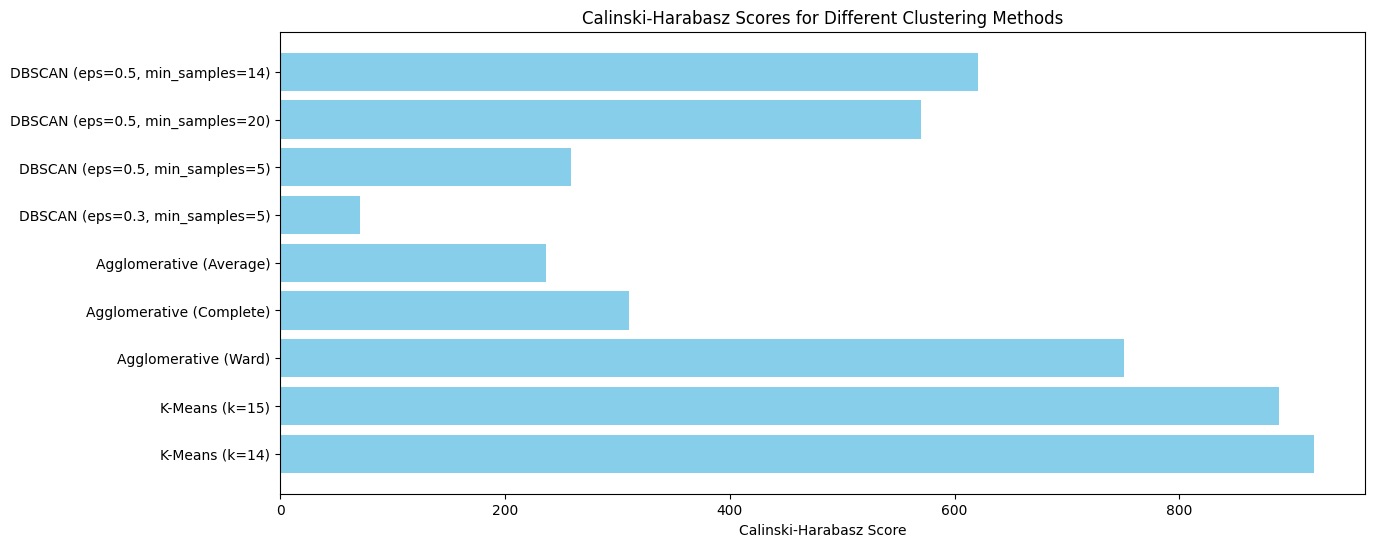

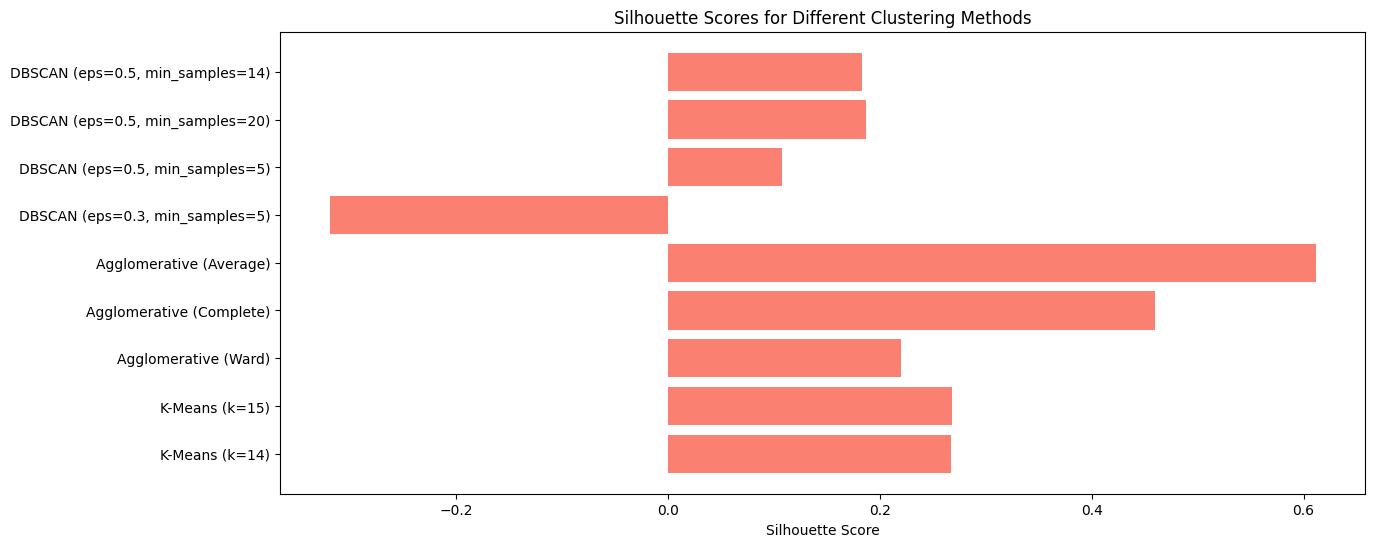

In [57]:
# Visualizations of these results
# Data
clustering_methods = [
    "K-Means (k=14)", "K-Means (k=15)",
    "Agglomerative (Ward)", "Agglomerative (Complete)", "Agglomerative (Average)",
    "DBSCAN (eps=0.3, min_samples=5)", "DBSCAN (eps=0.5, min_samples=5)",
    "DBSCAN (eps=0.5, min_samples=20)", "DBSCAN (eps=0.5, min_samples=14)"
]

calinski_harabasz_scores = [
    919.33, 888.99,
    750.29, 310.56, 236.08,
    70.56, 258.31, 569.88, 620.79
]

silhouette_scores = [
    0.2673, 0.2681,
    0.2200, 0.4600, 0.6116,
    -0.3193, 0.1080, 0.1873, 0.1828
]

# Plotting Calinski-Harabasz Scores
plt.figure(figsize=(14, 6))
plt.barh(clustering_methods, calinski_harabasz_scores, color='skyblue')
plt.xlabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Different Clustering Methods')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(14, 6))
plt.barh(clustering_methods, silhouette_scores, color='salmon')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Scores for Different Clustering Methods')
plt.show()

### Summary of Clustering Results

The following evaluation metrics are used to assess the performance of different clustering algorithms on a given dataset: Calinski-Harabasz score and Silhouette score.

**Calinski-Harabasz Score:** Measures how well the clusters are separated and how compact they are. <br>
**Silhouette Score:** Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). <br>

**K-Means Clustering**
*   K-Means clustering with k=14 and k=15 yields high Calinski-Harabasz scores, indicating good separation between clusters.
*   The Silhouette scores are moderate, suggesting that while clusters are well-separated, they may not be very cohesive internally.
*   Increasing k from 14 to 15 results in a slight drop in the Calinski-Harabasz score, indicating that the additional cluster may not significantly improve the cluster quality.
*   The moderate Silhouette scores suggest that some data points might be on the border of clusters or that clusters have similar densities. <br>

**Agglomerative Clustering**
*   Ward Linkage: Produces the highest Calinski-Harabasz score among the agglomerative methods, indicating good separation, but the Silhouette score is relatively low, suggesting that the clusters may not be very cohesive.
*   Complete Linkage: Results in lower Calinski-Harabasz score but a significantly higher Silhouette score, indicating more cohesive clusters with better-defined boundaries.
*   Average Linkage: Generates the highest Silhouette score, indicating well-separated and cohesive clusters, though the Calinski-Harabasz score is the lowest among the methods.
*   Different linkage criteria affect the clustering outcome significantly, with average linkage producing the most cohesive clusters and Ward linkage achieving better separation.

**DBSCAN Clustering**

*   eps=0.3, min_samples=5: Very low scores indicate poor clustering performance, with many points likely classified as noise.
*   eps=0.5, min_samples=5: Moderate improvement in both scores, indicating better-defined clusters but still not optimal.
*   eps=0.5, min_samples=20: Significant improvement, especially in Calinski-Harabasz score, indicating better separation and compactness of clusters.
*   eps=0.5, min_samples=14: Similar improvement as the previous setting, showing that increasing min_samples can help define clusters more clearly.
*   DBSCAN's performance varies greatly with parameter settings. Higher eps and min_samples values improve clustering quality, but the scores are generally lower than those of K-Means and Agglomerative clustering.


### Summary
**K-Means:** Effective at finding well-separated clusters but can struggle with clusters of varying densities.

**Agglomerative Clustering:** The choice of linkage criterion significantly impacts the results. Average linkage provides the most cohesive clusters.

**DBSCAN:** Sensitive to parameter settings. Higher eps and min_samples values can improve clustering quality, but overall performance is typically lower than K-Means and Agglomerative clustering.

Each algorithm has its strengths and weaknesses, and the choice of algorithm and parameters should be guided by the specific characteristics and requirements of the dataset.





### Labeling the data with best performing clustering models

In [58]:
# Labeling data with K-means clustering model with number of clusters 14, which is one of the best performing model

data_km = data

df_km = pd.DataFrame(labels_14, columns =['Cluster ID'])
data_km = pd.concat([data_km,df_km], axis=1)
data_km.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster ID
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,13


In [59]:
# Labeling data with Agglomerative Clustering (Average linkage)
data_h = data

df_h = pd.DataFrame(labels_average, columns =['Cluster ID'])
data_h = pd.concat([data_h,df_h], axis=1)
data_h.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster ID
0,28143,0,1,1,1,174,1,0,0,7000,0,5
1,19244,0,1,1,1,215,2,0,0,6968,0,5
2,41354,0,1,1,1,4123,4,0,0,7034,0,5
3,14776,0,1,1,1,500,1,0,0,6952,0,5
4,97752,0,4,1,1,43300,26,2077,4,6935,1,5
